In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
from pandas_datareader import data 
from datetime import datetime
from scipy.optimize import minimize

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import sys
sys.path.append("../")
import utility as erk

In [5]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

### Week 2 Assignment MPT part
Load the 30 industry return data using the erk.get_ind_returns() function that we developed during the lab sessions. For purposes of the remaining questions, use data during the 5 year period 2013-2017 (both inclusive) to estimate the expected returns as well as the covariance matrix. To be able to respond to the questions, you will need to build the MSR, EW and GMV portfolios consisting of the “Books”, “Steel”, "Oil", and "Mines" industries. Assume the risk free rate over the 5 year period is 10%.

### MSR

In [6]:
ind = erk.get_ind_returns()
ind = ind['2013':'2017'][['Books','Steel','Oil','Mines']]
er = erk.annualize_rets(ind,12)
cov = ind["2013":"2017"].cov()

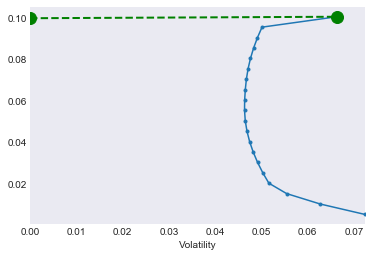

In [7]:
# plot EF
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
# get MSR
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [8]:
r_msr, vol_msr

(0.1007161676662427, 0.0662652335966291)

In [9]:
w_msr

array([0.00000000e+00, 1.00000000e+00, 2.08166817e-17, 6.01949046e-16])

### GMV

In [11]:
w_gmv = erk.gmv(cov)
w_gmv

array([0.47702487, 0.        , 0.43411203, 0.0888631 ])

### 2018 Vol

In [19]:
ind = erk.get_ind_returns()
ind = ind['2018'][['Books','Steel','Oil','Mines']]
cov_2018 = ind.cov()
vol_msr = erk.portfolio_vol(w_msr, cov_2018)
vol_gmv = erk.portfolio_vol(w_gmv, cov_2018)
#vol_msr = erk.annualize_vol(vol_msr,12)
#vol_gmv = erk.annualize_vol(vol_gmv,12)


In [21]:
vol_msr* (12**0.5), vol_gmv * (12**0.5)

(0.21983988181484188, 0.18973734520184568)